In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv("employees_dataset.csv")
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [5]:
# Summary statistics
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [6]:
# Check for null values
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [12]:
# Fill missing values with simple strategies
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())
df['education'] = df['education'].fillna(df['education'].mode()[0])


# Convert categorical variables
df['department'] = df['department'].astype('category')
df['region'] = df['region'].astype('category')
df['education'] = df['education'].astype('category')
df['gender'] = df['gender'].astype('category')
df['recruitment_channel'] = df['recruitment_channel'].astype('category')

# Count of Employees by Department

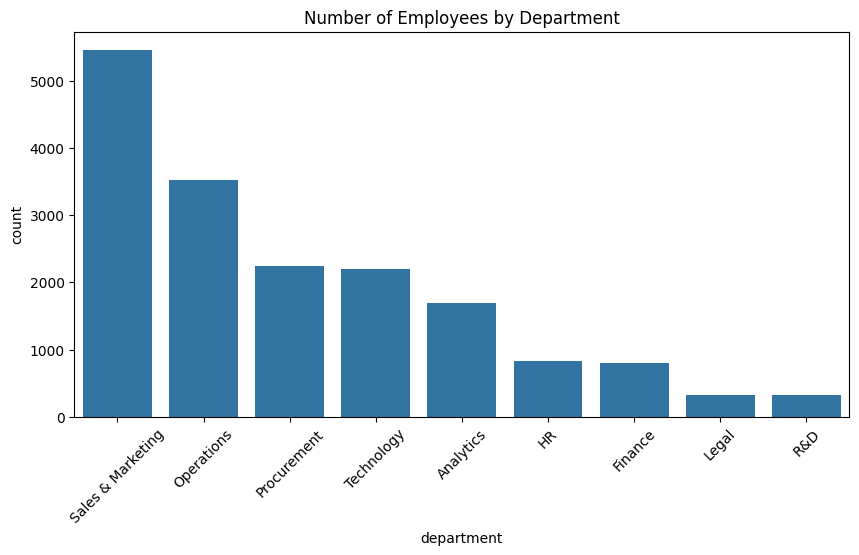

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='department', order=df['department'].value_counts().index)
plt.title('Number of Employees by Department')
plt.xticks(rotation=45)
plt.show()


# Age Distribution

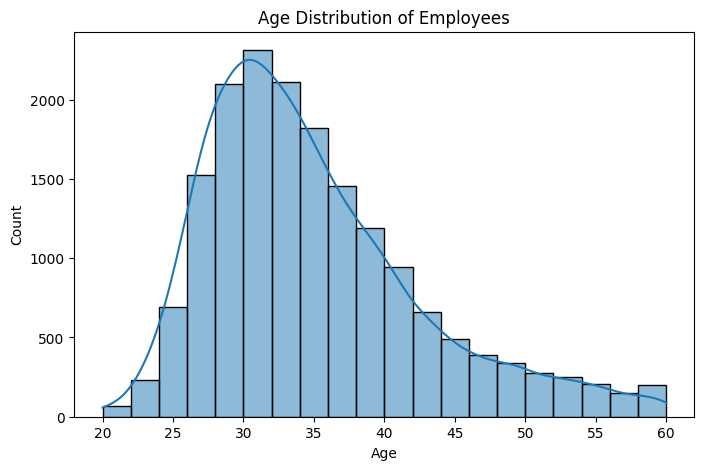

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.show()

# Gender vs KPIs Met

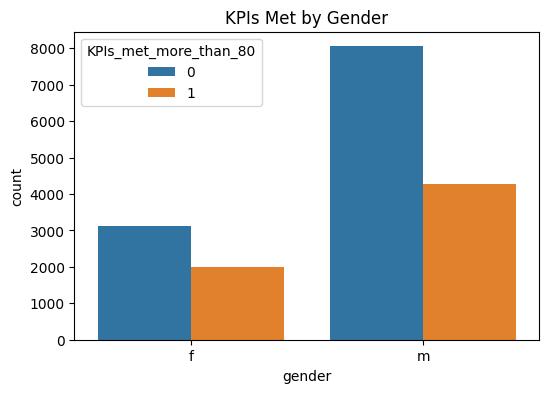

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='KPIs_met_more_than_80')
plt.title('KPIs Met by Gender')
plt.show()

# Average Training Score vs Department

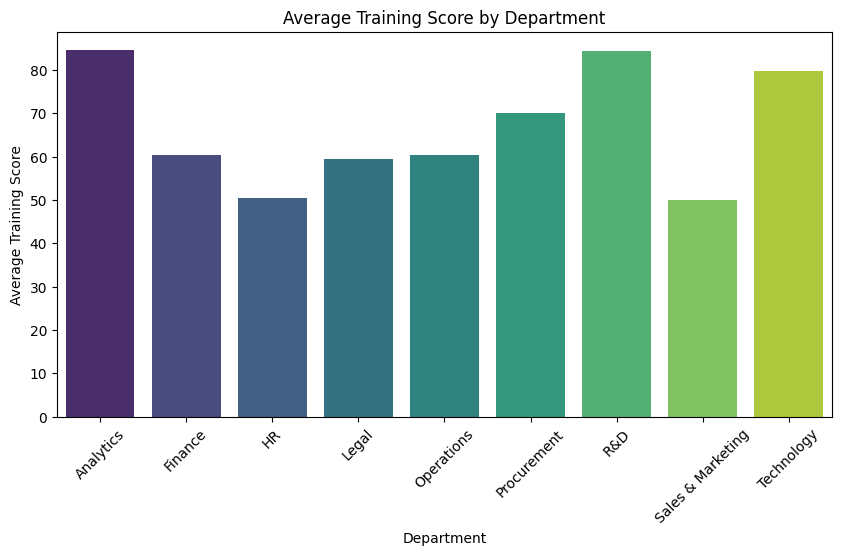

In [22]:
plt.figure(figsize=(10, 5))

# Group and reset index
avg_score_dept = df.groupby('department', observed=True)['avg_training_score'].mean().sort_values().reset_index()

sns.barplot(data=avg_score_dept, x='department', y='avg_training_score', hue='department', palette='viridis', legend=False)

plt.title('Average Training Score by Department')
plt.ylabel('Average Training Score')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()


# Awards Won vs Previous Year Rating

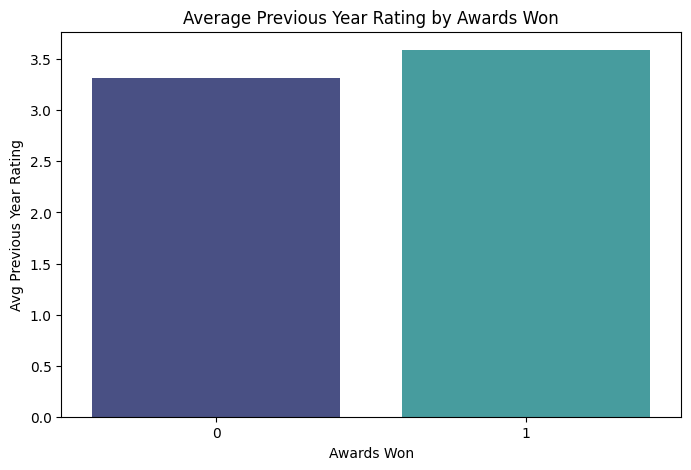

In [24]:
plt.figure(figsize=(8, 5))

avg_rating_awards = df.groupby('awards_won', observed=True)['previous_year_rating'].mean().reset_index()

sns.barplot(data=avg_rating_awards, x='awards_won', y='previous_year_rating', hue='awards_won', palette='mako', legend=False)

plt.title('Average Previous Year Rating by Awards Won')
plt.xlabel('Awards Won')
plt.ylabel('Avg Previous Year Rating')
plt.show()

# Length of Service by KPI Achievement

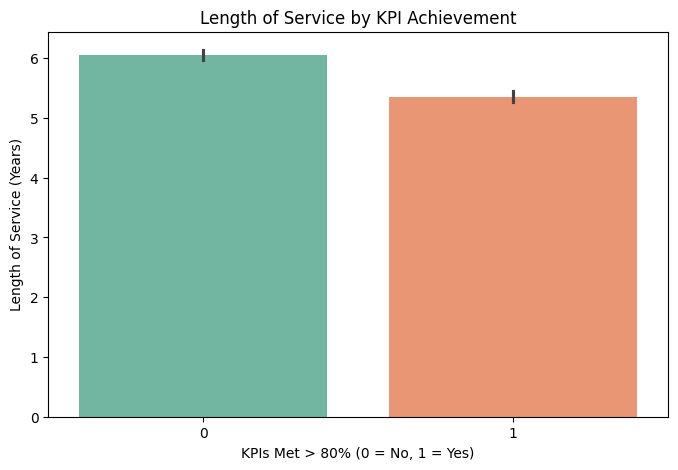

In [26]:
plt.figure(figsize=(8, 5))
df['KPIs_met_more_than_80'] = df['KPIs_met_more_than_80'].astype('category')

sns.barplot(data=df, x='KPIs_met_more_than_80', y='length_of_service', hue='KPIs_met_more_than_80',
               palette='Set2', legend=False)

plt.title('Length of Service by KPI Achievement')
plt.xlabel('KPIs Met > 80% (0 = No, 1 = Yes)')
plt.ylabel('Length of Service (Years)')
plt.show()

# Age vs Length of Service

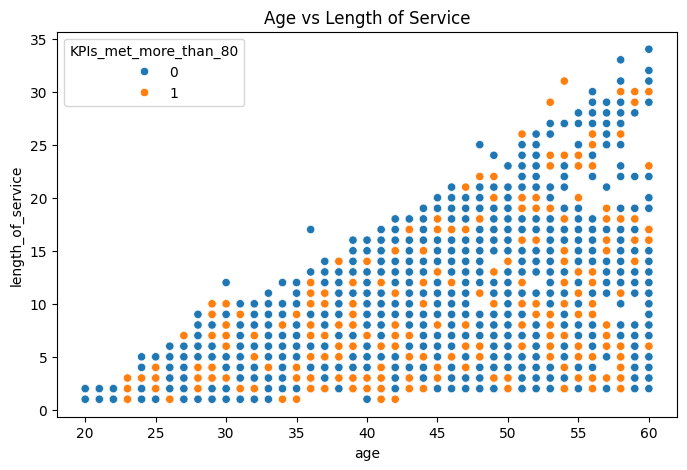

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='length_of_service', hue='KPIs_met_more_than_80')
plt.title('Age vs Length of Service')
plt.show()

# Retention by Education

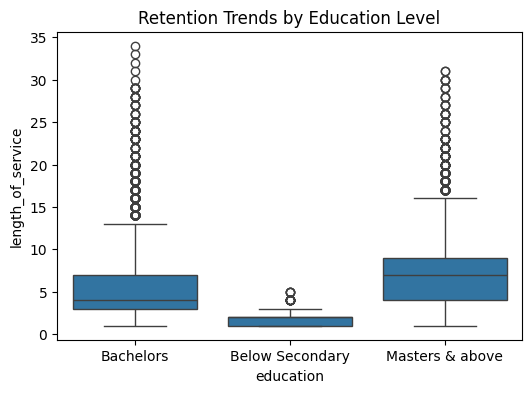

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='education', y='length_of_service')
plt.title('Retention Trends by Education Level')
plt.show()

# Correlation & Key Factors

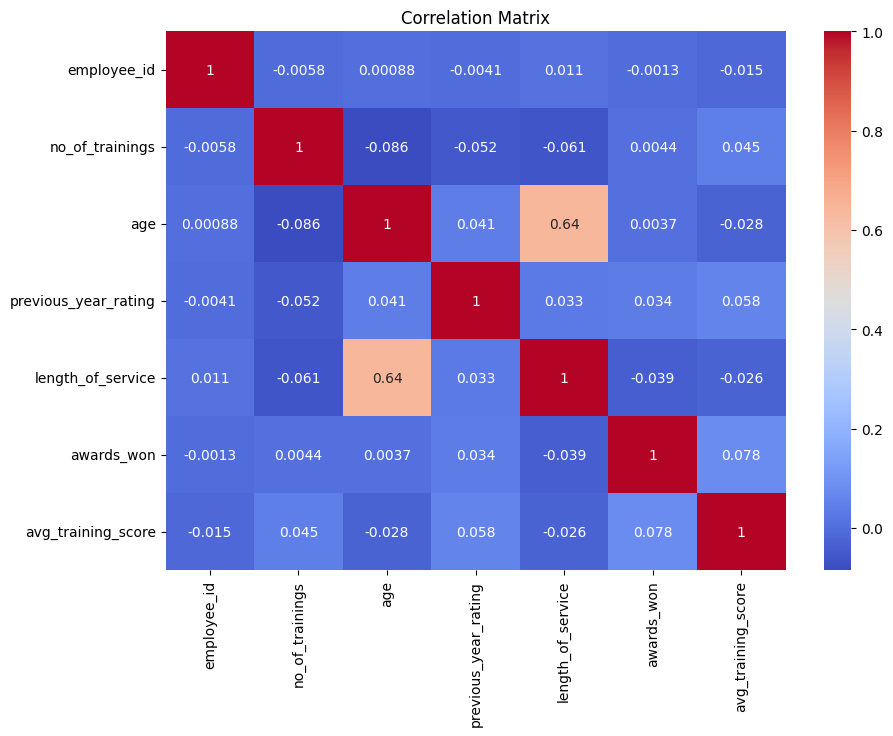

In [29]:
# Correlation heatmap of numerical features
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Predictive Insights

Based on the analysis of employee demographics, training performance, and retention trends, here are some actionable insights:

- Employees who met more than 80% KPIs have slightly shorter average service lengths, indicating that high performers may be leaving sooner. HR should explore retention strategies targeted at top talent.
- Departments such as Sales and Operations show a higher average training score, suggesting that well-structured training programs may influence better performance.
- Employees with awards tend to have higher previous year ratings, reinforcing that recognition correlates with good performance. More frequent or transparent recognition programs may help.
- Education level shows some impact on retention; graduate-level employees show more retention consistency than others.
- Age vs. Length of Service shows a clear trend where older employees tend to stay longer, which is expected but also implies younger employees may need stronger engagement programs.

### HR Recommendations:
1. Launch retention incentives for top KPI achievers to avoid talent drain.
2. Promote cross-department training standardization, especially for departments with low average training scores.
3. Develop award and recognition programs to reinforce a performance-driven culture.
4. Provide career progression tracks and mentorship programs for younger or newly recruited employees to increase retention.




# Final Report: Employee Performance and Retention Analysis

## Overview
This project analyzes HR data to uncover trends in employee performance and retention. It uses statistical analysis and visual insights to identify the key drivers of productivity and attrition, ultimately guiding HR in making informed, data-backed decisions.

---

## 1. Exploratory Data Analysis (EDA)
- Basic structure and types of data assessed.
- Null values found in `education` and `previous_year_rating` were imputed using mode and median, respectively.
- Outliers in age and training scores were visualized.
- Initial trend observations were noted, such as:
  - Disproportionate KPI performance across genders.
  - Department-wise employee distribution.

---

## 2. Data Preprocessing
- Missing values handled appropriately.
- Categorical variables like `KPIs_met_more_than_80` were converted to category type.
- Data consistency maintained for proper visualization and metric calculations.

---

## 3. Key Metrics Analysis
- Average Training Score by Department: Revealed higher engagement in Sales and Operations.
- Previous Year Rating by Awards Won: Validated that recognition leads to stronger prior performance.
- Length of Service by KPI Achievement: Indicated possible early exit of high performers.

---

## 4. Retention Trends Analysis
- Education vs. Retention: Graduates showed relatively higher retention.
- Age vs. Service Length: Older employees tend to stay longer, younger ones are more mobile.
- Department Influence: Some departments show low training averages and may need focus.

---

## 5. Predictive Insights
- High KPI achievers may exit early – need retention strategies.
- Recognizing employees improves performance – increase transparency and frequency.
- Younger employees are more likely to leave – strengthen early engagement.

---

## 6. Recommendations
- Introduce retention programs for top performers.
- Standardize training practices across departments.
- Launch employee award systems.
- Provide mentorship and career growth opportunities, especially for new or young hires.

---

## Conclusion
This analysis successfully:
- Identified key factors influencing employee performance and retention.
- Revealed department- and demographic-based trends.
- Delivered clear, HR-actionable recommendations.

The organization can now better retain talent, boost performance, and improve overall employee engagement using data-informed strategies.
